In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split

#Models ML
from sklearn.svm import SVC

#Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv(r'D:\data\diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


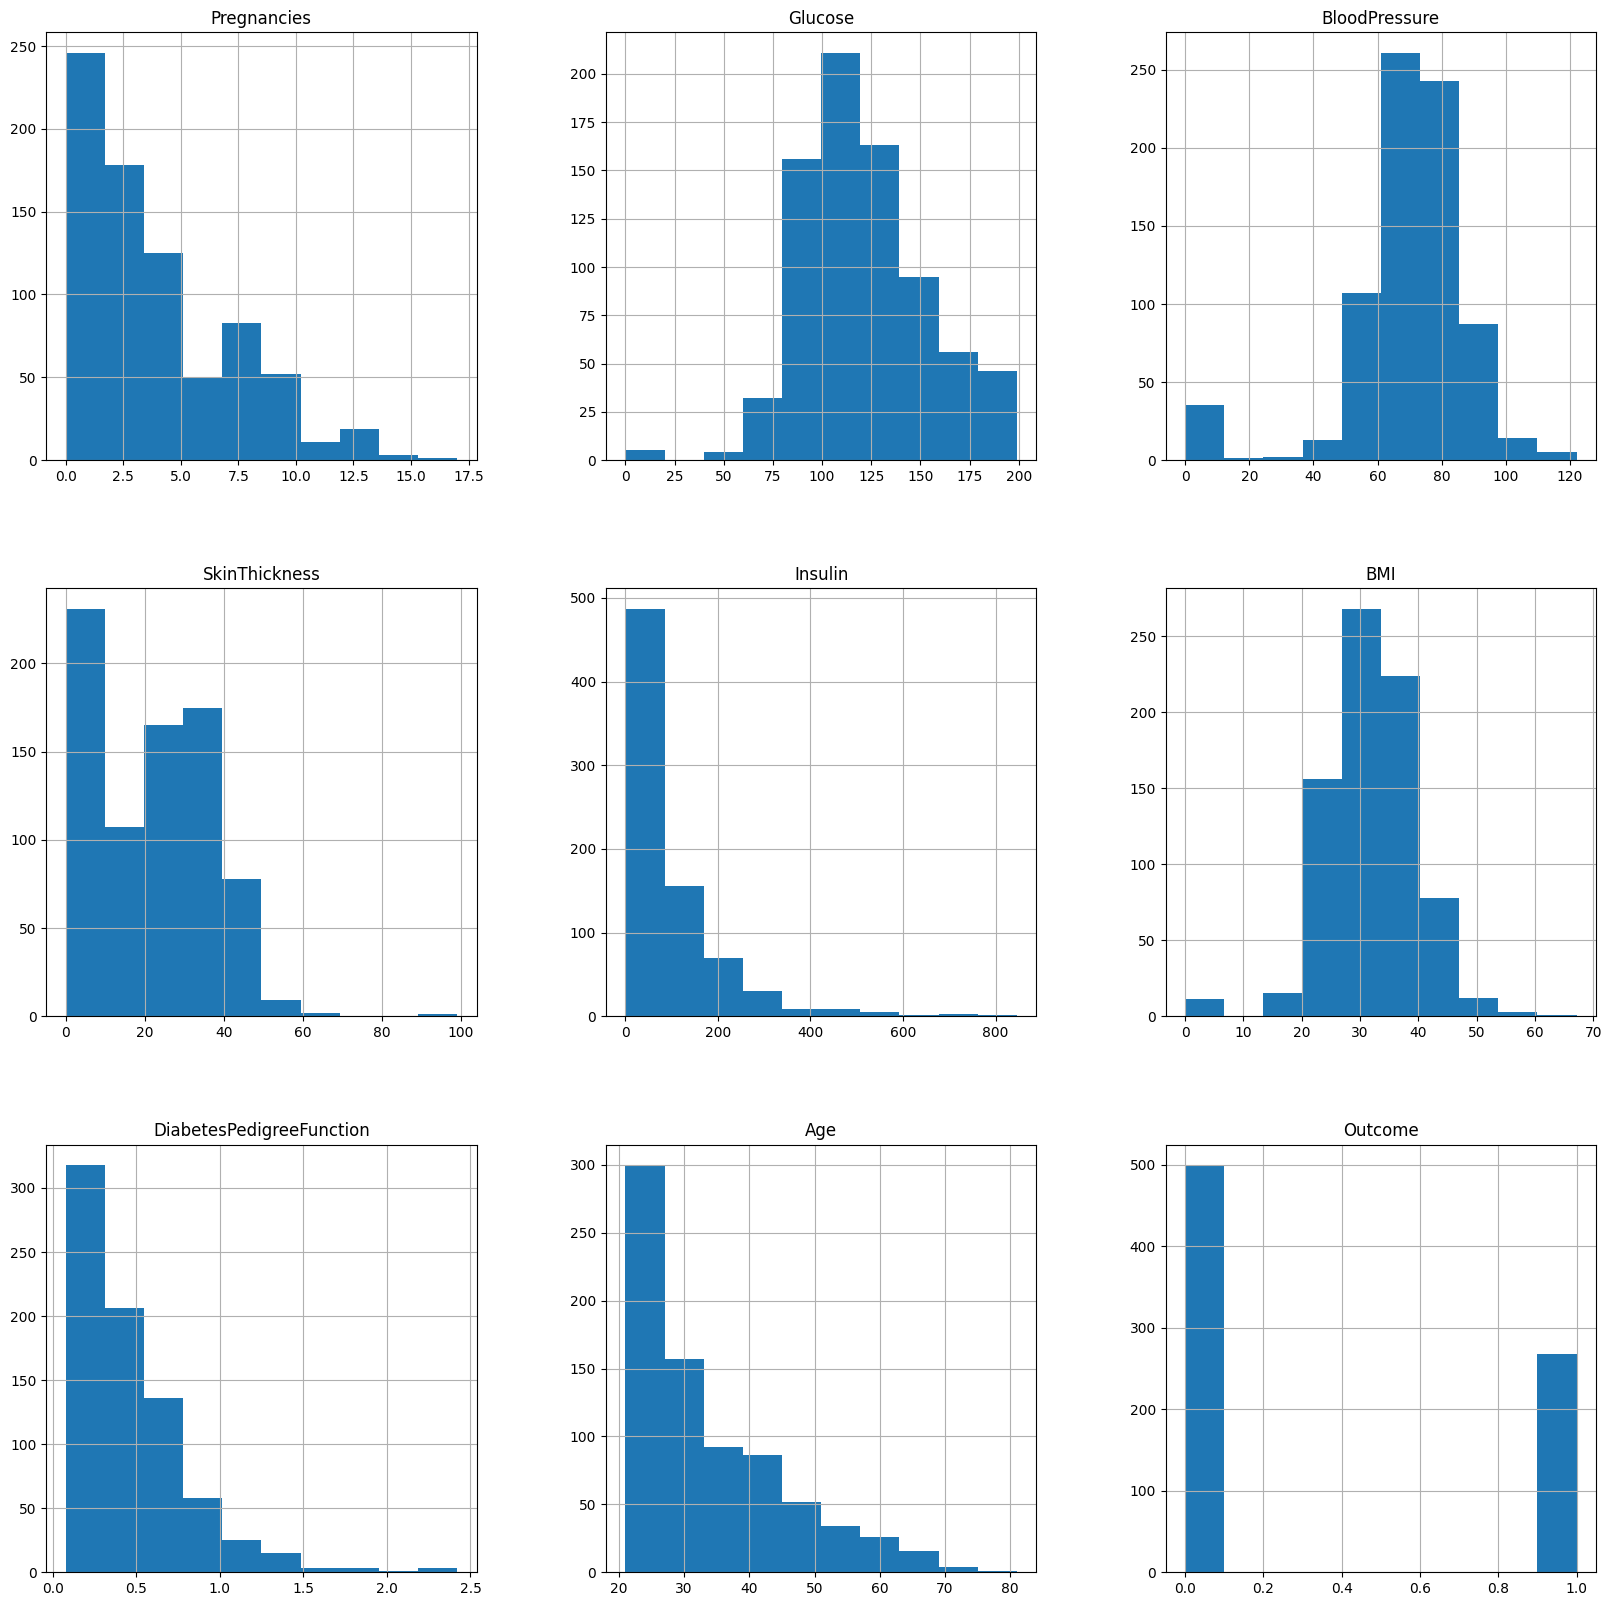

In [6]:
data.hist(figsize=(20, 20))
plt.show()

In [7]:
print(len(data[data['Outcome'] == 1]))
print(len(data[data['Outcome'] == 0]))

268
500


### Handling Null Values

In [8]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
select_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [10]:
# Display count of 0 values for each column

for col in select_col:
    count_zeros = (data[col] == 0).sum()
    print(f"{col}: {count_zeros}")

Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11


In [11]:
select_col_df = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
select_col_df = select_col_df.describe()
select_col_df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578
std,31.972618,19.355807,15.952218,115.244002,7.884160
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000
50%,117.000000,72.000000,23.000000,30.500000,32.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


In [12]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
mean,120.894531,69.105469,20.536458,79.799479,31.992578


In [13]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([120.89453125,  69.10546875,  20.53645833,  79.79947917,
        31.99257812])

In [14]:
# Replacing the values equal to 0 by the median
for col in data[select_col]:
    # data.loc[:,col].replace(0, data.loc[:,col].median(), inplace=True)
    data[col] = data[col].replace(0, data[col].median())

In [15]:
# print(col)
# data.loc[:,col].median() 

### Outlier Detection

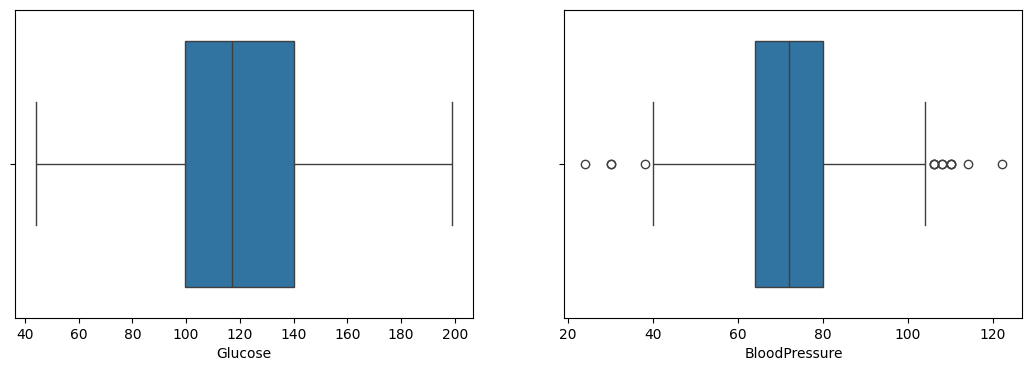

In [16]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(x='Glucose',data=data)

plt.subplot(1,2,2)
sns.boxplot(x='BloodPressure',data=data)

plt.show()

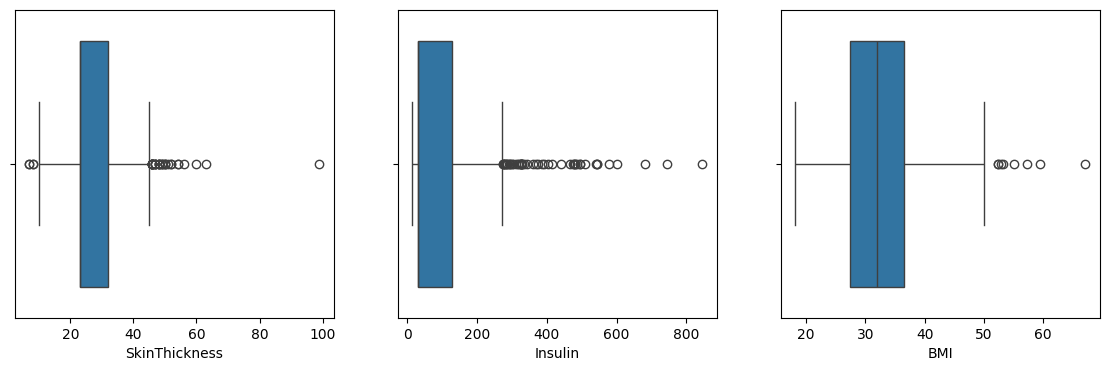

In [17]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.boxplot(x='SkinThickness',data=data)

plt.subplot(1,3,2)
sns.boxplot(x='Insulin',data=data)

plt.subplot(1,3,3)
sns.boxplot(x='BMI',data=data)

plt.show()

### Outlier Removal

In [18]:
outlier_column = ['BloodPressure','SkinThickness','Insulin','BMI']
new_df_cap = data.copy()

for rc in outlier_column:
    # finding quartiles & range
    q1 = data[rc].quantile(0.25)
    q3 = data[rc].quantile(0.75)
    IQR = q3-q1
    min_range=q1-(1.5*IQR)
    max_range=q3+(1.5*IQR)
    
    # capping (winsorization)
    new_df_cap[rc] = np.where(
        new_df_cap[rc]>max_range,                    #-> x
        max_range,                                   #-> y
        np.where(                                    #-> z
            new_df_cap[rc]<min_range,
            min_range,
            new_df_cap[rc]
        )
    )

# Updating the original dataset after capping
for rc in outlier_column:
    data[rc] = new_df_cap[rc]

### Visualization after Oultlier & Zero Value Removal

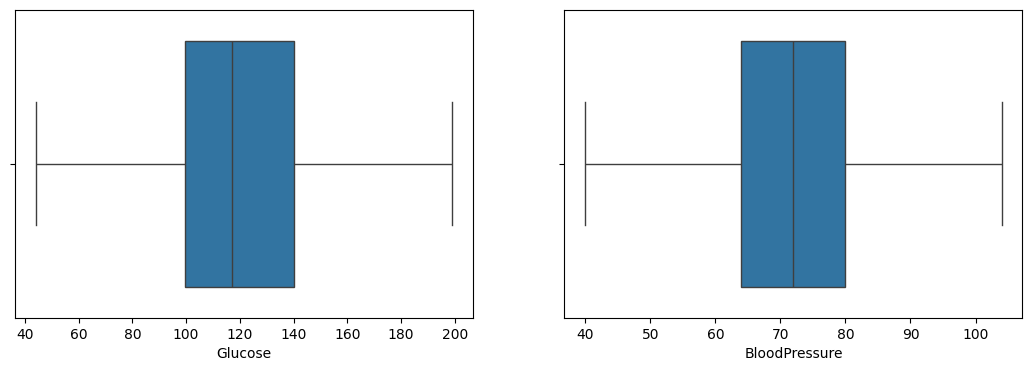

In [19]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
sns.boxplot(x='Glucose',data=data)

plt.subplot(1,2,2)
sns.boxplot(x='BloodPressure',data=data)

plt.show()

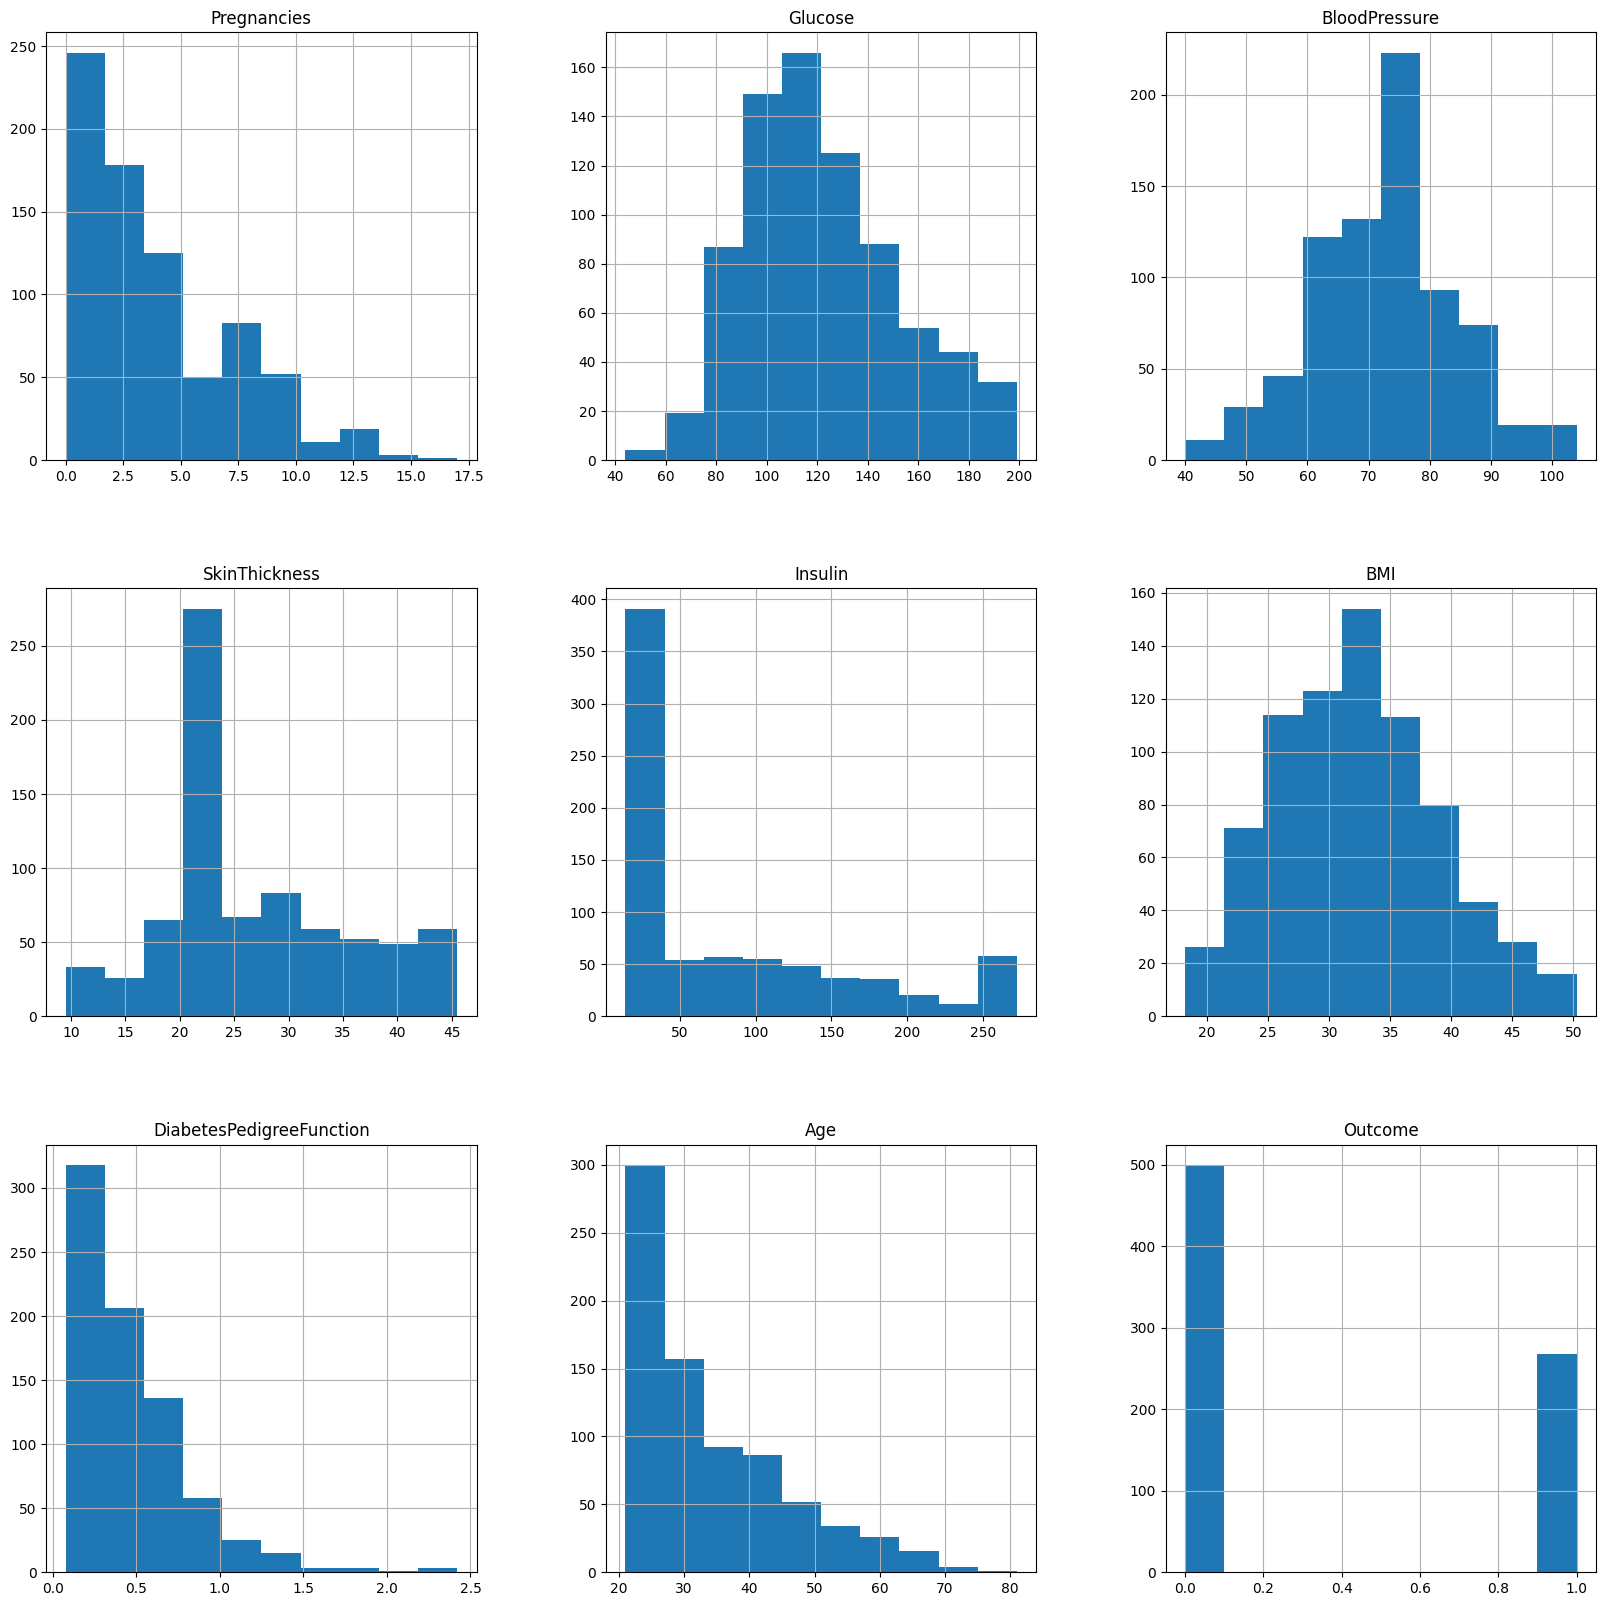

In [20]:
data.hist(figsize=(20, 20))
plt.show()

In [21]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.358073,27.116536,86.139811,32.389063,0.471876,33.240885,0.348958
std,3.369578,30.438286,11.697097,8.447423,76.287377,6.667627,0.331329,11.760232,0.476951
min,0.000000,44.000000,40.000000,9.500000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,104.000000,45.500000,272.375000,50.250000,2.420000,81.000000,1.000000


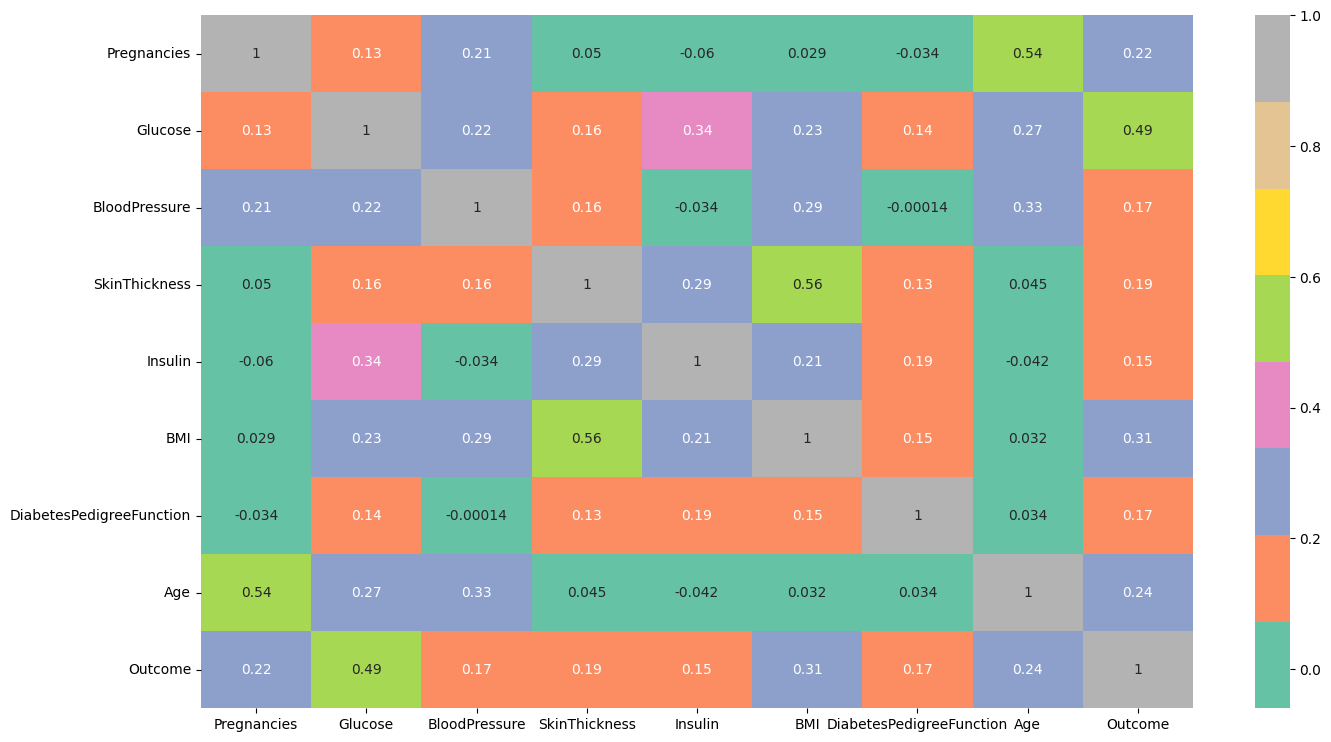

In [22]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

#### Splitting the dataset

In [23]:
X = data.iloc[:,:8]
# Y = data.iloc[:,8:]
Y = data['Outcome']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

In [25]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [26]:
print( (Y_test == 1).sum() )
print( (Y_test == 0).sum() )

55
99


### Model Selection

#### KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.score(X_test, Y_test)*100

76.62337662337663

In [29]:
Y_pred_knn = knn.predict(X_test)

knn_accuracy = accuracy_score(Y_test, Y_pred_knn) * 100
knn_precision = precision_score(Y_test, Y_pred_knn, average='binary')
knn_recall = recall_score(Y_test, Y_pred_knn, average='binary')
knn_f1 = f1_score(Y_test, Y_pred_knn, average='binary')

print(f"Accuracy  : {knn_accuracy:.2f}%")
print(f"Precision : {knn_precision:.3f}")
print(f"Recall    : {knn_recall:.3f}")
print(f"F1-Score  : {knn_f1:.3f}")

Accuracy  : 76.62%
Precision : 0.673
Recall    : 0.673
F1-Score  : 0.673


#### Naive Bayes

In [30]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(X_train,Y_train)

BernoulliNB()

In [31]:
bnb.score(X_test, Y_test)*100

64.28571428571429

In [55]:
# Y_pred_bnb = bnb.predict(X_test)

# bnb_accuracy = accuracy_score(Y_test, Y_pred_bnb) * 100
# bnb_precision = precision_score(Y_test, Y_pred_bnb, average='binary')
# bnb_recall = recall_score(Y_test, Y_pred_bnb, average='binary')
# bnb_f1 = f1_score(Y_test, Y_pred_bnb, average='binary')

# print(f"Accuracy  : {bnb_accuracy:.2f}%")
# print(f"Precision : {bnb_precision:.3f}")
# print(f"Recall    : {bnb_recall:.3f}")
# print(f"F1-Score  : {bnb_f1:.3f}")

#### Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(X_train,Y_train)

DecisionTreeClassifier()

In [34]:
dtr.score(X_test, Y_test)*100

63.63636363636363

In [35]:
Y_pred_dtr = dtr.predict(X_test)

dtr_accuracy = accuracy_score(Y_test, Y_pred_dtr) * 100
dtr_precision = precision_score(Y_test, Y_pred_dtr, average='binary')
dtr_recall = recall_score(Y_test, Y_pred_dtr, average='binary')
dtr_f1 = f1_score(Y_test, Y_pred_dtr, average='binary')

print(f"Accuracy  : {dtr_accuracy:.2f}%")
print(f"Precision : {dtr_precision:.3f}")
print(f"Recall    : {dtr_recall:.3f}")
print(f"F1-Score  : {dtr_f1:.3f}")

Accuracy  : 63.64%
Precision : 0.492
Recall    : 0.545
F1-Score  : 0.517


#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [37]:
lr.score(X_test, Y_test)*100

77.27272727272727

In [38]:
Y_pred_lr = lr.predict(X_test)

lr_accuracy = accuracy_score(Y_test, Y_pred_lr) * 100
lr_precision = precision_score(Y_test, Y_pred_lr, average='binary')
lr_recall = recall_score(Y_test, Y_pred_lr, average='binary')
lr_f1 = f1_score(Y_test, Y_pred_lr, average='binary')

print(f"Accuracy  : {lr_accuracy:.2f}%")
print(f"Precision : {lr_precision:.3f}")
print(f"Recall    : {lr_recall:.3f}")
print(f"F1-Score  : {lr_f1:.3f}")

Accuracy  : 77.27%
Precision : 0.738
Recall    : 0.564
F1-Score  : 0.639


#### SVM

In [39]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)

SVC()

In [40]:
svc.score(X_test, Y_test)*100

79.22077922077922

In [41]:
Y_pred_svc = svc.predict(X_test)

svc_accuracy = accuracy_score(Y_test, Y_pred_svc) * 100
svc_precision = precision_score(Y_test, Y_pred_svc, average='binary')
svc_recall = recall_score(Y_test, Y_pred_svc, average='binary')
svc_f1 = f1_score(Y_test, Y_pred_svc, average='binary')

print(f"Accuracy  : {svc_accuracy:.2f}%")
print(f"Precision : {svc_precision:.3f}")
print(f"Recall    : {svc_recall:.3f}")
print(f"F1-Score  : {svc_f1:.3f}")

Accuracy  : 79.22%
Precision : 0.848
Recall    : 0.509
F1-Score  : 0.636


#### Prediction

In [42]:
d = X_test.iloc[0:1]
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74.0,26.0,135.0,26.0,0.647,51


In [43]:
Y_test.iloc[0:1]

285    0
Name: Outcome, dtype: int64

In [44]:
new_data = {'Pregnancies':[3],'Glucose':[120],'BloodPressure':[80],'SkinThickness':[30],'Insulin':[110],'BMI':[25],'DiabetesPedigreeFunction':[0.66],'Age':[40]}
d = pd.DataFrame(new_data)

In [45]:
# print("Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age")
# sp = input("\nEnter the value for the feature").split()
# input_value = [float(x) for x in sp]
# print(input_value)

In [46]:
# feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
# d = pd.DataFrame([input_value], columns=feature_names)

In [47]:
Y_score = svc.predict(d)
print(Y_score)

[0]


In [48]:
def impressions(model,accuracy,Y_pred):
    print(f"Accuracy:{accuracy:.2f} %")
    cm = confusion_matrix(Y_test,Y_pred)
    
    # Rearrange the matrix to match the desired convention
    # cm[0, 0] = TN,   cm[0, 1] = FP,   cm[1, 0] = FN,   cm[1, 1] = TP
    cm = np.array([[cm[1, 1], cm[1, 0]],
                         [cm[0, 1], cm[0, 0]]]) 
    # Define the labels
    labels = [1, 0]
    
    sns.heatmap(cm ,annot=True,cmap='Set2',linewidths=2,
               xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy:79.22 %


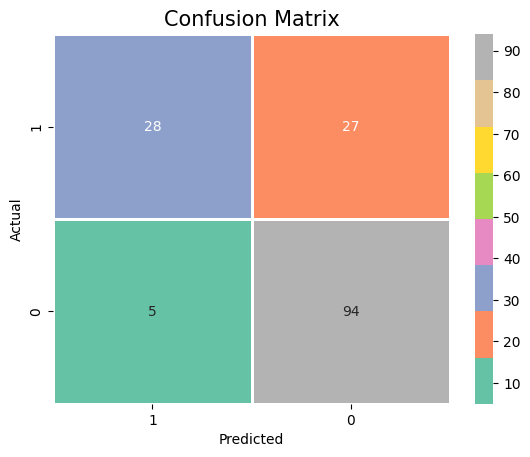

In [49]:
impressions(svc,svc_accuracy,Y_pred_svc)

Accuracy:76.62 %


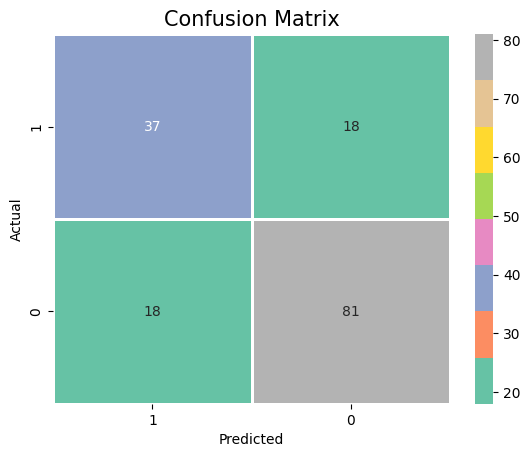

In [50]:
impressions(knn,knn_accuracy,Y_pred_knn)

Accuracy:77.27 %


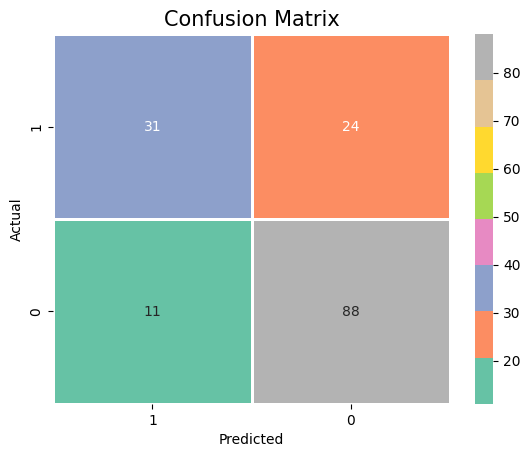

In [51]:
impressions(lr,lr_accuracy,Y_pred_lr)

Accuracy:63.64 %


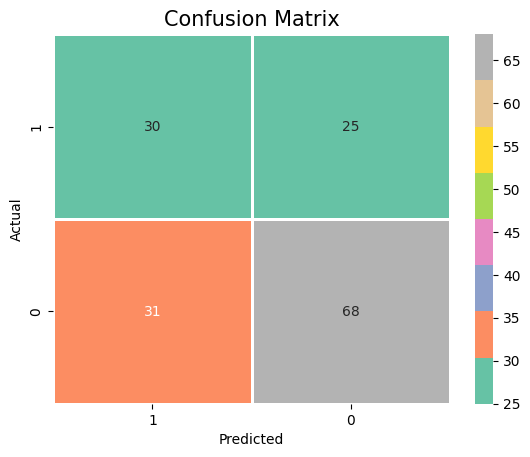

In [52]:
impressions(dtr,dtr_accuracy,Y_pred_dtr)

In [53]:
# impressions(bnb,bnb_accuracy,Y_pred_bnb)